In [62]:
#Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, exp

In [3]:
df=pd.read_csv('MontaProdMeteo.csv', parse_dates=True, dayfirst=True, index_col='Date')

EXPLORATORY DATA ANALYSIS

In [4]:
df.keys()

Index(['PROD_C', 'PROD_D', 'MWS', 'PRECIP', 'HUM', 'PRES', 'CLCOVER', 'HI',
       'DEWP', 'WINDT', 'SNOW', 'UVIND', 'SUNH', 'T_MEAN'],
      dtype='object')

In [5]:
df.head(2)

,PROD_C,PROD_D,MWS,PRECIP,HUM,PRES,CLCOVER,HI,DEWP,WINDT,SNOW,UVIND,SUNH,T_MEAN
Date,,,,,,,,,,,,,,
2018-02-02,1227576,27247.0,14,0.7,93,1010,46.75,0,0,-8,0.5,2,9.9,-3.5
2018-02-03,1254823,27247.0,11,1.2,91,1010,59.25,0,0,-8,1.0,1,9.9,-4.0


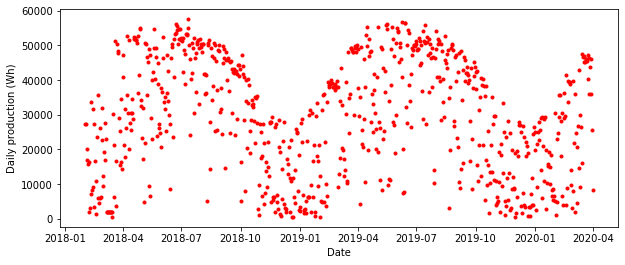

In [6]:
plt.figure(figsize=(10, 4))
_=plt.plot(df['PROD_D'], 'ro', markersize=3)
plt.xlabel('Date')
plt.ylabel('Daily production (Wh)')
plt.savefig('Daily production February 2018 - March 2020')

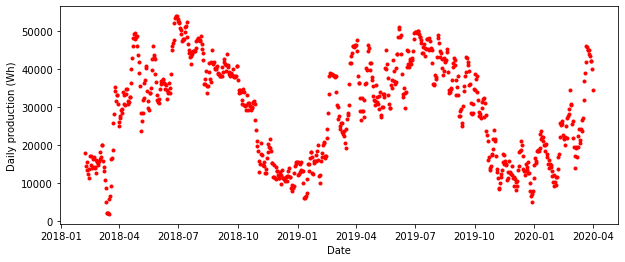

In [7]:
#Scatter plot of rolling mean (7d)
plt.figure(figsize=(10, 4))
_=plt.plot(df['PROD_D'].rolling(7).mean(), 'ro', markersize=3)
plt.xlabel('Date')
plt.ylabel('Daily production (Wh)')
plt.savefig('Moving average (7 days) February 2018 - March 2020')

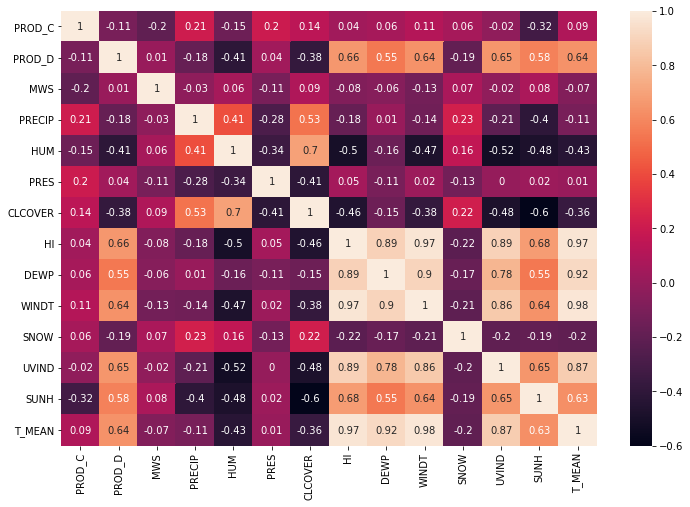

In [8]:
corr_matrix = df.corr().round(2)
df_corr=pd.DataFrame(corr_matrix)
fig, ax = plt.subplots(figsize=(12,8))
_=sns.heatmap(data=corr_matrix, annot=True)
plt.savefig('Matrice de correlation')

Definition of parameters:
- HI = Indice de chaleurs qui combine la température de l'air ambiant et l'humidité relative
- T_MEAN = Température moyenne journalière
- WINDT = Température du vent
- HUM = Humidité
- CLCOVER = nébulosité: couverture nuageuse qui définit la fraction du ciel couverte par les nuages
- SUNH = durée d'ensoleillement: indicateur climatique qui mesure la durée temporelle pendant laquelle un endroit, un lieu est soumis à l'insolation effective, c'est-à-dire soumis à un rayonnement solaire suffisamment intense et puissant pour produire des ombres bien distinctes. Cette indicateur est directement lié à la nébulosité, la part du ciel couvert par les nuages

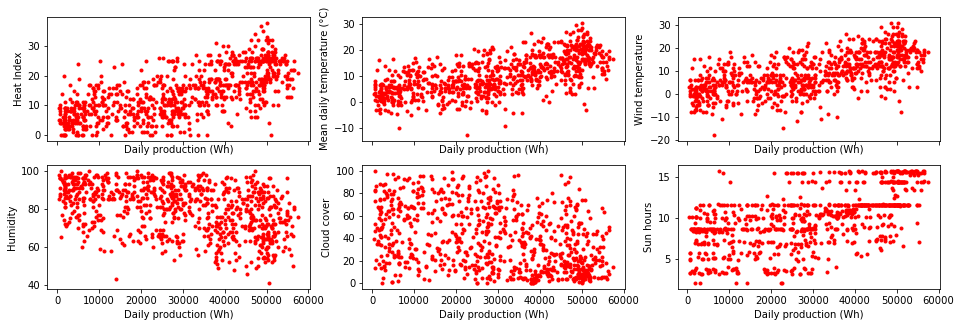

In [9]:
_fig, axs=plt.subplots(2, 3, figsize=(16, 5), sharex=True)
#scatter plot of daily production versus heatindex
axs[0,0].plot(df['PROD_D'], df['HI'], 'ro', markersize=3)
axs[0,0].set_xlabel('Daily production (Wh)')
axs[0,0].set_ylabel('Heat Index')
#scatter plot of daily production versus mean daily temperature
axs[0,1].plot(df['PROD_D'], df['T_MEAN'], 'ro', markersize=3)
axs[0,1].set_xlabel('Daily production (Wh)')
axs[0,1].set_ylabel('Mean daily temperature (°C)')
#scatter plot of daily production versus wind temperature
axs[0,2].plot(df['PROD_D'], df['WINDT'], 'ro', markersize=3)
axs[0,2].set_xlabel('Daily production (Wh)')
axs[0,2].set_ylabel('Wind temperature')
#scatter plot of daily production versus humidity
axs[1,0].plot(df['PROD_D'], df['HUM'], 'ro', markersize=3)
axs[1,0].set_xlabel('Daily production (Wh)')
axs[1,0].set_ylabel('Humidity')
#scatter plot of daily production versus cloud cover
axs[1,1].plot(df['PROD_D'], df['CLCOVER'], 'ro', markersize=3)
axs[1,1].set_xlabel('Daily production (Wh)')
axs[1,1].set_ylabel('Cloud cover')
#scatter plot of daily production versus sunhours
axs[1,2].plot(df['PROD_D'], df['SUNH'], 'ro', markersize=3)
axs[1,2].set_xlabel('Daily production (Wh)')
axs[1,2].set_ylabel('Sun hours')

plt.savefig('scatter plots')

In [50]:
PROD_C=df['PROD_C'].loc['2019-12-31']-df['PROD_C'].loc['2019-01-01']

Prod_D=df['PROD_D']
Prod_C=Prod_D.loc['2019-01-01':'2019-12-31'].sum()

Prod_D_r=df['PROD_D'].rolling(7).mean()
Prod_C_r=Prod_D_r.loc['2019-01':'2019-12'].sum()
print(PROD_C, Prod_C_r)
print(PROD_C/Prod_C_r)

10893546 10891912.857142858
1.000149940867005


In [47]:
df['PROD_C'].loc['2019-12-31']-df['PROD_C'].loc['2019-01-01']

10893546

In [34]:
df['PROD_D'].describe()

count      789.000000
mean     29363.935361
std      16600.947503
min        513.000000
25%      15101.000000
50%      29683.000000
75%      45110.000000
max      57508.000000
Name: PROD_D, dtype: float64

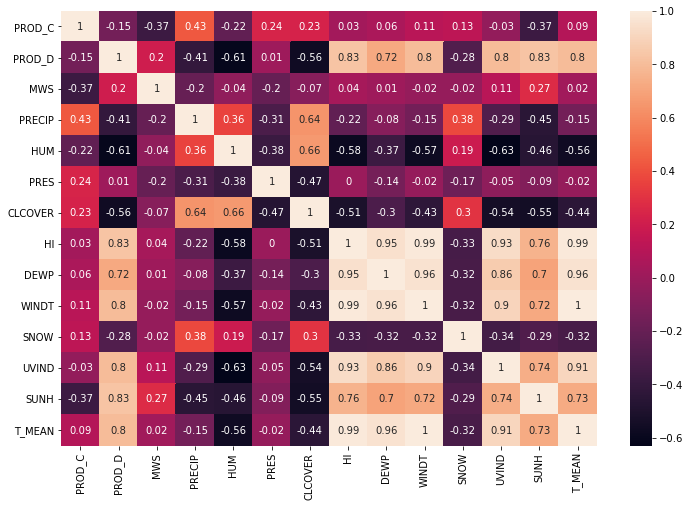

In [11]:
#correlation and scatter plots based on rolling mean (7d)
corr_matrix_r = df.rolling(7).mean().corr().round(2)
df_corr_r=pd.DataFrame(corr_matrix)
fig, ax = plt.subplots(figsize=(12,8))
_=sns.heatmap(data=corr_matrix_r, annot=True)
plt.savefig('Matrice de correlation moyenne mobile')

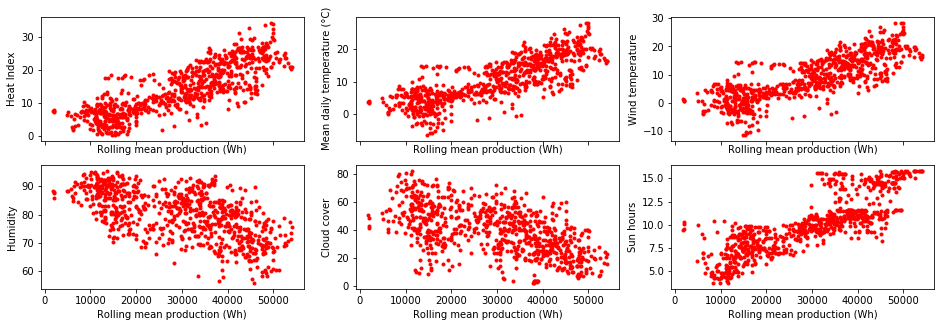

In [12]:
_fig, axs=plt.subplots(2, 3, figsize=(16, 5), sharex=True)
#scatter plot of daily production versus heatindex
axs[0,0].plot(df['PROD_D'].rolling(7).mean(), df['HI'].rolling(7).mean(), 'ro', markersize=3)
axs[0,0].set_xlabel('Rolling mean production (Wh)')
axs[0,0].set_ylabel('Heat Index')
#scatter plot of daily production versus mean daily temperature
axs[0,1].plot(df['PROD_D'].rolling(7).mean(), df['T_MEAN'].rolling(7).mean(), 'ro', markersize=3)
axs[0,1].set_xlabel('Rolling mean production (Wh)')
axs[0,1].set_ylabel('Mean daily temperature (°C)')
#scatter plot of daily production versus wind temperature
axs[0,2].plot(df['PROD_D'].rolling(7).mean(), df['WINDT'].rolling(7).mean(), 'ro', markersize=3)
axs[0,2].set_xlabel('Rolling mean production (Wh)')
axs[0,2].set_ylabel('Wind temperature')
#scatter plot of daily production versus humidity
axs[1,0].plot(df['PROD_D'].rolling(7).mean(), df['HUM'].rolling(7).mean(), 'ro', markersize=3)
axs[1,0].set_xlabel('Rolling mean production (Wh)')
axs[1,0].set_ylabel('Humidity')
#scatter plot of daily production versus cloud cover
axs[1,1].plot(df['PROD_D'].rolling(7).mean(), df['CLCOVER'].rolling(7).mean(), 'ro', markersize=3)
axs[1,1].set_xlabel('Rolling mean production (Wh)')
axs[1,1].set_ylabel('Cloud cover')
#scatter plot of daily production versus sunhours
axs[1,2].plot(df['PROD_D'].rolling(7).mean(), df['SUNH'].rolling(7).mean(), 'ro', markersize=3)
axs[1,2].set_xlabel('Rolling mean production (Wh)')
axs[1,2].set_ylabel('Sun hours')

plt.savefig('rolling mean scatter plots')

In [13]:
df_r=df.rolling(7).mean()
df_r.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 789 entries, 2018-02-02 to 2020-03-31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PROD_C   783 non-null    float64
 1   PROD_D   783 non-null    float64
 2   MWS      783 non-null    float64
 3   PRECIP   783 non-null    float64
 4   HUM      783 non-null    float64
 5   PRES     783 non-null    float64
 6   CLCOVER  783 non-null    float64
 7   HI       783 non-null    float64
 8   DEWP     783 non-null    float64
 9   WINDT    783 non-null    float64
 10  SNOW     783 non-null    float64
 11  UVIND    783 non-null    float64
 12  SUNH     783 non-null    float64
 13  T_MEAN   783 non-null    float64
dtypes: float64(14)
memory usage: 92.5 KB


TEST MULTIPLE ALGORITHMS

In [14]:
#Load general packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
# drop the PROD_C column
df1=df.drop(['PROD_C'], axis=1)

#split the dataset in X and y. For X the selected params are SUNH, DEWP
X, y=df1[['HI','HUM', 'SUNH']], df1.iloc[:, 0] #'SUNH', 'DEWP', 'HUM', 'CLCOVER'
X.shape, y.shape

((789, 3), (789,))

Ridge Model

In [63]:
#with daily data
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#define and call the estimator
ridge=Ridge()

#define parameter space for alpha
params={'alpha': np.linspace(0,1,30)}

#split the data set in train and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

#Creat the grid search object for the chosen estimator
ridge_cv=GridSearchCV(ridge, params, cv=5)

#fit the training set
_=ridge_cv.fit(X_train, y_train)

#predict y as function of X_train 
y_pred=ridge_cv.predict(X_test)

#print metrics and parameters
r2=ridge_cv.score(X_test, y_test)
mse=mean_squared_error(y_test, y_pred)
print('Tuned ridge alpha: {}'.format(ridge_cv.best_params_))
print('Tuned Ridge R squared: {}'.format(round(r2, 4)))
print('Root mean squared error: {}'.format(round(sqrt(mse), 4)))

Tuned ridge alpha: {'alpha': 1.0}
Tuned Ridge R squared: 0.5163
Root mean squared error: 11233.7086


Text(0, 0.5, 'Residual (kWh)')

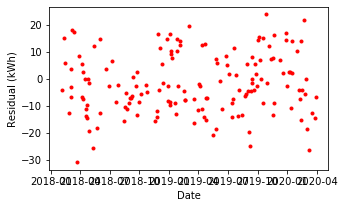

In [59]:
residual=(y_pred-y_test)/1000
plt.figure(figsize=(5, 3))
_=plt.plot(residual, 'ro', markersize=3)
plt.xlabel('Date')
plt.ylabel('Residual (kWh)')

In [18]:
#with weekly data
#resample data to get weekly data
df1_res=df1.resample('W').mean()

#split the dataset in X and y. 
X_w, y_w=df1_res[['HI','HUM', 'SUNH']], df1_res.iloc[:, 0]
X_w.shape, y_w.shape

((114, 3), (114,))

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#define and call the estimator
ridge=Ridge()

#define parameter space for alpha
params={'alpha': np.linspace(0,1,30)}

#split the data set in train and test sets
X_train, X_test, y_train, y_test =train_test_split(X_w, y_w, test_size=0.2, random_state=42)

#Creat the grid search object for the chosen estimator
ridge_cv=GridSearchCV(ridge, params, cv=5)

#fit the training set
_=ridge_cv.fit(X_train, y_train)

#predict y as function of X_test
y_pred_w=ridge_cv.predict(X_test)

#print metrics and parameters
r2=ridge_cv.score(X_test, y_test)
mse_w=mean_squared_error(y_test, y_pred_w)
print('Tuned ridge alpha: {}'.format(ridge_cv.best_params_))
print('Tuned Ridge R squared: {}'.format(round(r2, 4)))
print('Root mean squared error: {}'.format(round(sqrt(mse_w), 4)))

Tuned ridge alpha: {'alpha': 0.0}
Tuned Ridge R squared: 0.7254
Root mean squared error: 6513.9378


In [61]:
mse/mse_w

2.9741240895963963

Decision Tree